<a href="https://colab.research.google.com/github/hasankachamathvi/LogisticsRegression/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [90]:
fp= pd.DataFrame(pd.read_csv("/content/Bank.csv"))

In [ ]:
fp.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
fp.tail()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,222,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,196,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,62,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,200,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,112,1.1,93.994,-36.4,4.859,5191.0,0


In [91]:
x= fp.iloc[:,:7] #data allocation
y= fp.iloc[:,7]

In [92]:
x.shape

(41188, 7)

In [93]:
y.value_counts()

,count
y,
0,36548
1,4640


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
len(x_train)#how many x values are there for training

32950

In [94]:
from sklearn.linear_model import LogisticRegression #importing logistic regression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
#importing matrixes for the classification

In [ ]:
model = LogisticRegression() #train the model

In [ ]:
model.fit(x_train, y_train) #fit the model

LogisticRegression()

In [ ]:
model.coef_

array([[ 0.00762742,  0.004711  , -0.26675086,  0.34753622,  0.06368184,
        -0.31349164, -0.00645946]])

In [ ]:
model.intercept_

array([0.00366827])

In [ ]:
y_pred = model.predict(x_test) #prodiction for the model

In [ ]:
print("First 5 values of y_test", y_test[:5])

First 5 values of y_test 33148    0
27585    0
15722    0
40349    1
2576     0
Name: y, dtype: int64


In [ ]:
print("First 5 values of y_pred", y_pred[:5])

First 5 values of y_pred [0 0 0 1 0]


In [ ]:
y_test

,y
33148,0
27585,0
15722,0
40349,1
2576,0
...,...
661,0
40023,0
3643,0
30302,0


In [ ]:
y_pred_probs=model.predict_proba(x_test)
#probability value prediction for 0 and 1
#if is more than 0.5 we can decide whether it is 0 and 1
#here the positive class has been taken as 0

In [ ]:
print(y_pred_probs)

[[0.98854757 0.01145243]
 [0.99115823 0.00884177]
 [0.97867091 0.02132909]
 ...
 [0.94651101 0.05348899]
 [0.99197475 0.00802525]
 [0.58357582 0.41642418]]


# Getting Probability Values

In [ ]:
y_pred_probs = model.predict_proba(x_test)[:,0]
#getting predicted probability value of class 1 as a 1D array

In [ ]:
y_pred_probs[:5]

array([0.98854757, 0.99115823, 0.97867091, 0.47275654, 0.98647154])

In [ ]:
y_pred_probs=model.predict_proba(x_test)[:,1]
#getting predicted probability value of class 1 as a 1D array

In [ ]:
y_pred_probs[:5]

array([0.01145243, 0.00884177, 0.02132909, 0.52724346, 0.01352846])

# Evaluating the classification Model

In [ ]:
confusion_matrix(y_test, y_pred)

array([[7097,  185],
       [ 636,  320]])

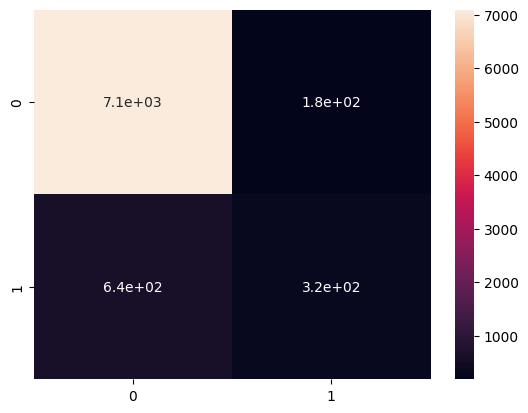

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

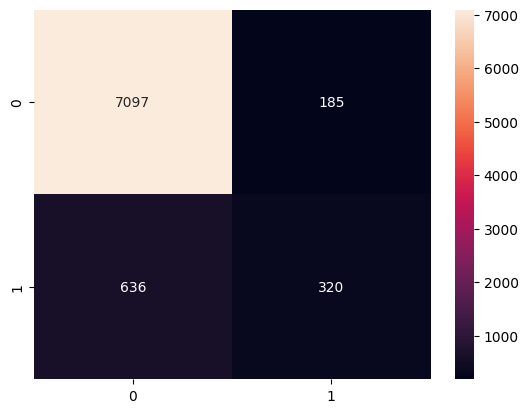

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g")
#to see the values in real numbers
plt.show()

# Evaluation Metrics

In [ ]:
accuracy_score(y_test, y_pred)
#finding accuracy of classification model

0.9003398883224083

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.95      7282\n           1       0.63      0.33      0.44       956\n\n    accuracy                           0.90      8238\n   macro avg       0.78      0.65      0.69      8238\nweighted avg       0.88      0.90      0.89      8238\n'

In [ ]:
print(classification_report(y_test, y_pred))
#because of using 2 values 0 and 1 - precision, recall
#sumation of tp,tn - accuracy

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7282
           1       0.63      0.33      0.44       956

    accuracy                           0.90      8238
   macro avg       0.78      0.65      0.69      8238
weighted avg       0.88      0.90      0.89      8238



In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred_probs)#we are going to produce the curve

Text(0.5, 1.0, 'ROC Curve')

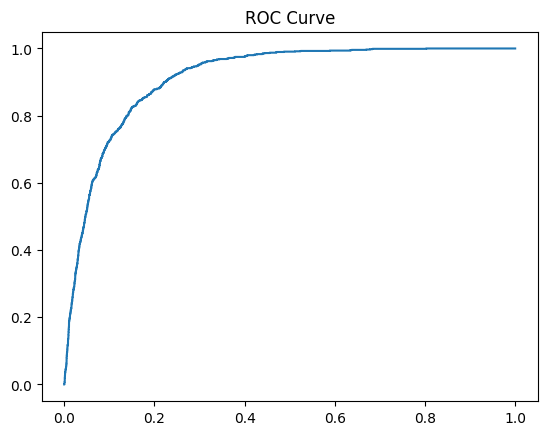

In [ ]:
plt.plot(fpr,tpr)
plt.title("ROC Curve")

In [46]:
y_pred_probs=model.predict_proba(x_test)[:,1]#getting predicted probability value of class 1 as a 1D array

In [47]:
y_pred_probs[:5]

array([0.01145243, 0.00884177, 0.02132909, 0.52724346, 0.01352846])

In [ ]:
#prob = pd.DataFrame(y_pred_probs,columns=['probability'])#conver the array to a data frame

# How to do a prediction

In [ ]:
#44 210 1.4 93.444 -36.1  4.963  5228.1

In [53]:
arr=np.array([28,399,-1.7,94.055,-39.8, 0.729, 4991]).reshape(1,7)

In [54]:
model.predict(arr)

array([1])

# How to work with imbalanced classes




In [126]:
y.value_counts()

,count
y,
0,36548
1,4640


In [127]:
from imblearn.over_sampling import SMOTE, ADASYN
# SMOTE and ADASYN are the two methods that we use

In [128]:
smt= SMOTE()

In [129]:
x1,y1=smt.fit_resample(x,y)

In [130]:
y1.value_counts()

,count
y,
0,36548
1,36548


In [131]:
x1.shape

(73096, 7)

In [132]:
ada=ADASYN()
#2nd method to deal with class imbalance issue

In [133]:
x2,y2=ada.fit_resample(x,y)

In [134]:
y2.value_counts()

,count
y,
1,37352
0,36548


In [135]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, test_size=0.2, random_state=100)

In [136]:
len(x1_train)#how many x1 values are there for training

58476

In [138]:
model = LogisticRegression() #train the model

In [139]:
from sklearn.linear_model import LogisticRegression #importing logistic regression

In [140]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
#importing matrixes for the classification

In [141]:
model.fit(x1_train, y1_train) #fit the model

LogisticRegression()

In [142]:
model.coef_

array([[-0.00327256,  0.00657865, -1.08583706,  0.66746714,  0.02616582,
         0.5474808 , -0.01280561]])

In [143]:
model.intercept_

array([0.00533331])

In [144]:
y1_pred = model.predict(x1_test) #prodiction for the model

In [145]:
print("First 5 values of y1_test", y1_test[:5])

First 5 values of y1_test 62994    1
32323    0
61302    1
57412    1
36631    1
Name: y, dtype: int64


In [146]:
print("First 5 values of y1_pred", y1_pred[:5])

First 5 values of y1_pred [1 0 1 1 1]


In [147]:
y1_test

,y
62994,1
32323,0
61302,1
57412,1
36631,1
...,...
50879,1
24400,0
58734,1
68007,1


In [148]:
y1_pred_probs=model.predict_proba(x1_test)

In [149]:
print(y1_pred_probs)

[[0.14827047 0.85172953]
 [0.62083759 0.37916241]
 [0.31822682 0.68177318]
 ...
 [0.4749054  0.5250946 ]
 [0.20801931 0.79198069]
 [0.92998126 0.07001874]]


In [150]:
y1_pred_probs = model.predict_proba(x1_test)[:,0]

In [151]:
y1_pred_probs[:5]

array([0.14827047, 0.62083759, 0.31822682, 0.00254139, 0.16264539])

In [152]:
confusion_matrix(y1_test, y1_pred)

array([[6097, 1166],
       [1118, 6239]])

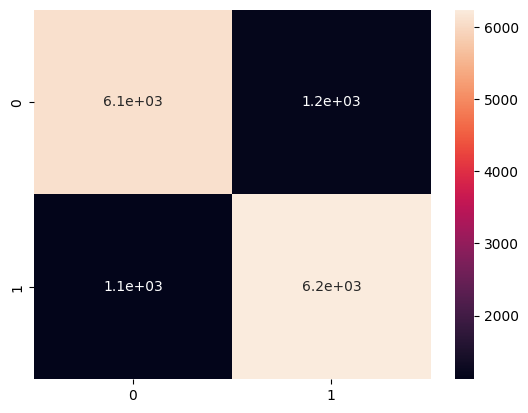

In [153]:
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True)
plt.show()

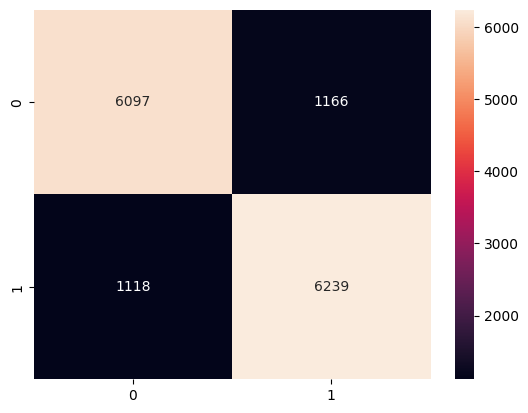

In [154]:
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt="g")
#to see the values in real numbers
plt.show()

In [155]:
accuracy_score(y1_test, y1_pred)
#finding accuracy of classification model

0.8437756497948017

In [156]:
classification_report(y1_test, y1_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.84      0.84      7263\n           1       0.84      0.85      0.85      7357\n\n    accuracy                           0.84     14620\n   macro avg       0.84      0.84      0.84     14620\nweighted avg       0.84      0.84      0.84     14620\n'

In [159]:
print(classification_report(y1_test, y1_pred))
#because of using 2 values 0 and 1 - precision, recall
#sumation of tp,tn - accuracy

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7263
           1       0.84      0.85      0.85      7357

    accuracy                           0.84     14620
   macro avg       0.84      0.84      0.84     14620
weighted avg       0.84      0.84      0.84     14620



In [160]:
fpr,tpr,_=roc_curve(y1_test,y1_pred_probs)#we are going to produce the curve

Text(0.5, 1.0, 'ROC Curve')

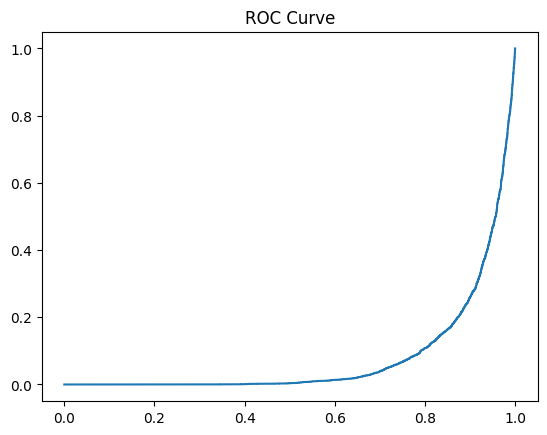

In [161]:
plt.plot(fpr,tpr)
plt.title("ROC Curve")

In [162]:
y1_pred_probs=model.predict_proba(x1_test)[:,1]#getting predicted probability value of class 1 as a 1D array

In [163]:
y1_pred_probs[:5]

array([0.85172953, 0.37916241, 0.68177318, 0.99745861, 0.83735461])

Comparing test(actual Values) and prediction

In [157]:
result=pd.DataFrame(data =[y_test.values, y_pred],index=['y_test','y_pred'])

In [158]:
result.transpose()

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
8233,0,0
8234,0,0
8235,0,0
8236,0,0


To check how many values are correct

In [164]:
correct_sum=[]
pred=model.predict(x_test)
correct=np.sum(pred==y_test)
correct_sum.append(correct)

In [165]:
correct_sum

[np.int64(6927)]

In [166]:
len(x_test)

8238